IMPORT LIBRARY

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATASET

In [86]:
df = pd.read_csv('Rumah.csv')

DESKRIPSI

In [87]:
df.head()

,HARGA,LT,LB,JKT,JKM,GRS,KOTA
0,28000000000,1100,700,5,6,1,JAKSEL
1,19000000000,824,800,4,4,1,JAKSEL
2,4700000000,500,400,4,3,1,JAKSEL
3,4900000000,251,300,5,4,1,JAKSEL
4,28000000000,1340,575,4,5,1,JAKSEL


MELIHAT TIPE DATA

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   HARGA   1001 non-null   int64 
 1   LT      1001 non-null   int64 
 2   LB      1001 non-null   int64 
 3   JKT     1001 non-null   int64 
 4   JKM     1001 non-null   int64 
 5   GRS     1001 non-null   int64 
 6   KOTA    1001 non-null   object
dtypes: int64(6), object(1)
memory usage: 54.9+ KB


In [89]:
df.describe()

,HARGA,LT,LB,JKT,JKM,GRS
count,1.001000e+03,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,1.747472e+10,530.504496,487.275724,4.457542,3.940060,0.778222
std,2.079548e+10,531.069773,452.872262,2.004606,1.903261,0.415650
min,4.300000e+08,22.000000,38.000000,1.000000,1.000000,0.000000
25%,6.750000e+09,220.000000,300.000000,4.000000,3.000000,1.000000
50%,1.350000e+10,400.000000,411.000000,4.000000,4.000000,1.000000
75%,2.000000e+10,677.000000,600.000000,5.000000,4.000000,1.000000
max,2.500000e+11,6790.000000,10000.000000,27.000000,27.000000,1.000000


VALIDASI DATA MENGAMBIL TYPE DATA ANGKA SEBAGAI ACUAN

<Axes: >

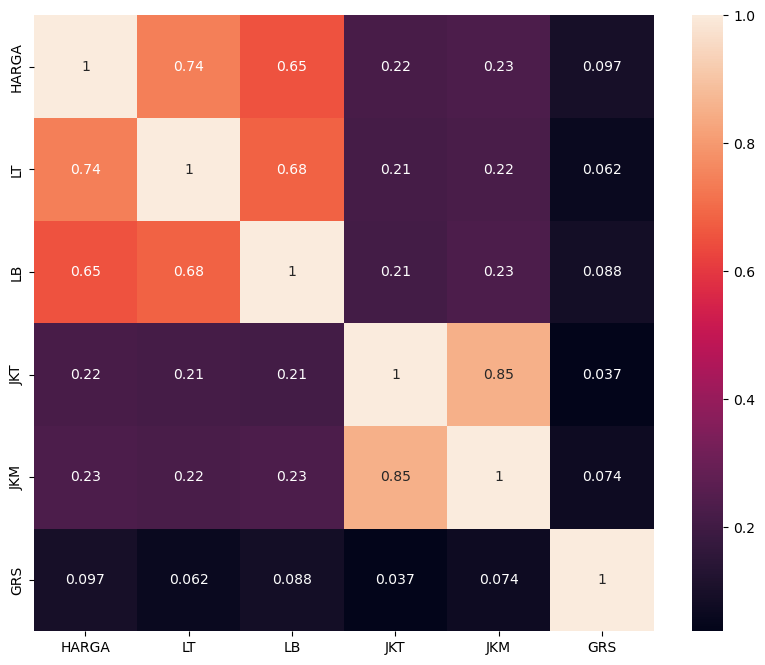

In [90]:
df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

LEBAR TANAH

JUMLAH KAMAR TIDUR

<Axes: xlabel='JUMLAH KAMAR TIDUR', ylabel='HARGA'>

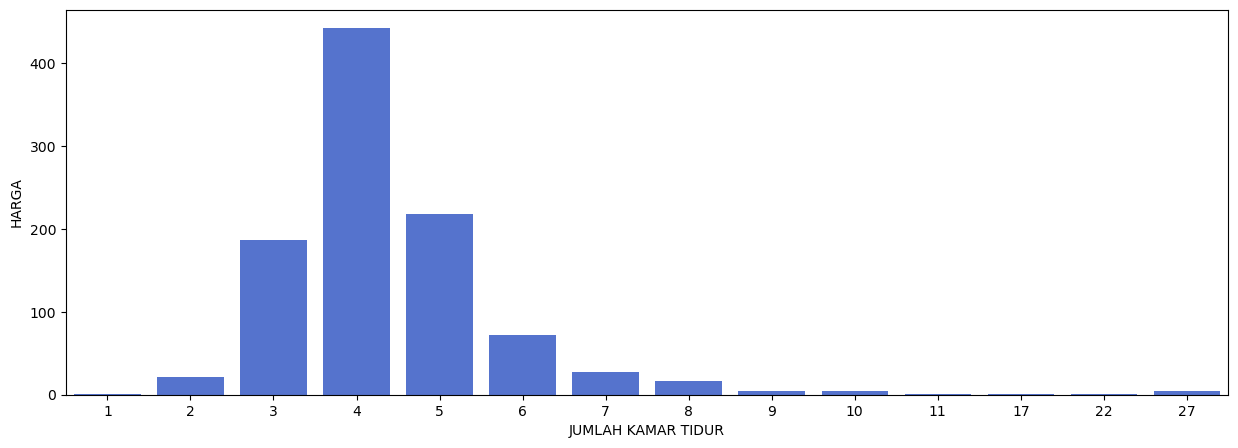

In [91]:
kamarTidur = df.groupby('JKT').count()[['HARGA']].sort_values(by='HARGA').reset_index()
kamarTidur = kamarTidur.rename(columns={'HARGA' : 'HARGA'})
kamarTidur = kamarTidur.rename(columns={'JKT' : 'JUMLAH KAMAR TIDUR'})

plt.figure(figsize=(15,5))
sns.barplot(x=kamarTidur['JUMLAH KAMAR TIDUR'], y=kamarTidur['HARGA'], color='royalblue')

JUMLAH KAMAR MANDI

<Figure size 1500x500 with 0 Axes>

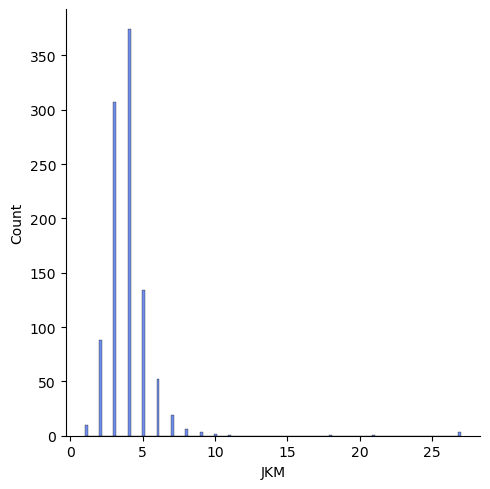

In [92]:
plt.figure(figsize=(15,5))
sns.displot(df['JKM'], color='royalblue')

JUMLAH PARKIRAN

distribusi harga rumah

<Figure size 1500x500 with 0 Axes>

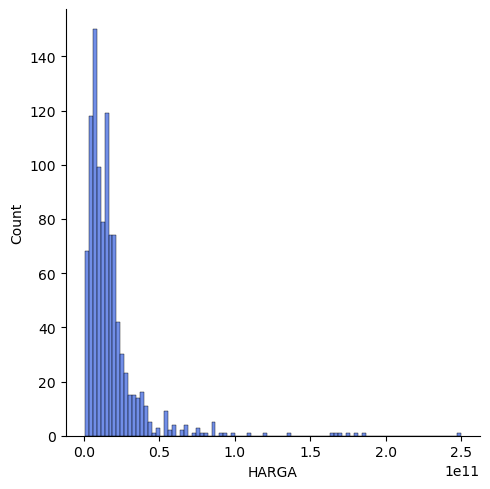

In [93]:
plt.figure(figsize=(15,5))
sns.displot(df['HARGA'], color='royalblue')

;L

SELEKSI FITUR

In [94]:
features = ['LT', 'LB', 'JKT', 'JKM', 'GRS']
x = df[features]
y = df['HARGA']
x.shape, y.shape

((1001, 5), (1001,))

SPLIT DATA TRAINING DAN DATA TESTING

In [95]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=70)

In [96]:
print("Data latih setelah dilalukan Train-Validation Split :",len(x_train))
print("Data latih setelah dilalukan Train-Validation Split :",len(x_test))

Data latih setelah dilalukan Train-Validation Split : 750
Data latih setelah dilalukan Train-Validation Split : 251


# MODEL REGRESI LINIER

In [97]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
score = lr.score(x_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.5920248155178813


# MODEL DECISION TREE

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

dt = DecisionTreeClassifier(
    max_depth=None,
    min_samples_split = 2
)
dt.fit(x_train,y_train)
y_pred= dt.predict(x_test)
score = metrics.accuracy_score(y_test, y_pred)
print("Akurasi Menggunakan Decision Tree :",score)

Akurasi Menggunakan Decision Tree : 0.20717131474103587


MEMBUAT INPUTAN MODEL UNTUK IMPORT KE FLASK

In [99]:
#LT, LB, JKT, JKM, GRS
input_data = np.array([[824, 800, 4, 4, 1]])

prediction = lr.predict(input_data)
print('Estimasi harga rumah : ', prediction)

Estimasi harga rumah :  [2.78416921e+10]


c:\Users\ytbcr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


SAVE MODEL

In [100]:
import pickle 
pickle.dump(lr,open('rumah.pkl','wb'))